In [7]:
#导入包
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

#使用pandas读取数据支持xls和xlsx
data=pd.read_excel("C:\\Users\\有福有德\Desktop\\上海统计分析python20200418\\data\\运动.xlsx")
data.head(2)

,体重,饮食,性别,亲缘,运动时间,骑行时间
0,70.001005,2,1,4,0.357143,3.714286
1,42.800000,1,1,3,2.142857,2.285714


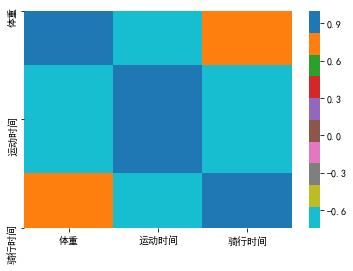

In [2]:
#相关分析corr
# plt.scatter(x="运动时间",y="体重",s=100,data=data,alpha=0.3)#alpha=气泡透明度，22为尺寸
data.corr(method="spearman")#显示所有变量，method=pearson、kendall、spearman
# data.corr()["体重"]#显示绩效总分与其他变量的相关系数
sns.heatmap(data.corr(method="spearman"),cmap='tab10_r')
# sns.pairplot(data=data.iloc[:,[0,1,2,3,4,5]],vars=["运动时间", "骑行时间","体重"],hue='亲缘')
# plt.show()
# from scipy import stats
# r,p=stats.pearsonr(data["体重"],data["运动时间"])#显示p值
# print(r,p)

In [22]:
import statsmodels.formula.api as smf
result=smf.ols("体重~饮食+性别+亲缘+运动时间+骑行时间",data=data).fit()#回归方法
result.summary()
# result.params#显示回归系数
#"绩效总分~适应总分+np.log(情绪总分)"自变量取对数
#正态分布检验JB：JB=n/6*(S^2+(K-3)^2/4):
#共线性诊断：Cond. No=最大特征值/最小特征值，一般认为大于900为共线性。

#----------ols法与梯度下降法的对比---------------
# from sklearn.linear_model import LinearRegression,Lasso
# x,y=data.iloc[:,1:],data.iloc[:,0]
# reg=LinearRegression().fit(x,y)
# print("线性回归的准确度%s和系数%s" %(reg.score(x,y),reg.coef_))

# lasso=Lasso(alpha=0,max_iter=1000).fit(x,y)
# print("lasso回归的准确度%s和系数%s" %(lasso.score(x,y),lasso.coef_))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     体重   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     130.2
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           2.48e-81
Time:                        16:28:23   Log-Likelihood:                -1317.5
No. Observations:                 402   AIC:                             2647.
Df Residuals:                     396   BIC:                             2671.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.6272      3.101     11.811      0.000      30.530      42.724
饮食             1.4433      0.680      2.124      0.034       0.107       2.779
性别             0.7859      0.672      1.169      0.243      -0.536       2.107
亲缘             1.5324      0.372      4.120      0.000       0.801       2.264
运动时间         -10.5029      1.051     -9.992      0.000     -12.570      -8.436
骑行时间          10.8209      0.681     15.883      0.000       9.482      12.160
==============================================================================
Omnibus:                      154.168   Durbin-Watson:                   1.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1076.572
Skew:                          -1.457   Prob(JB):                    1.68e-234
Kurtosis:                      10.469   Cond. No.                         46.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#----------统计法---------------
b1=np.cov(data['体重'],data['运动时间'])[1][0]/np.var(data['运动时间'])
b0=np.mean(data['体重'])-b1*np.mean(data['运动时间'])
print('截距项:%.2f;斜率:%.2f'%(b0,b1))


截距项:80.42;斜率:-17.85


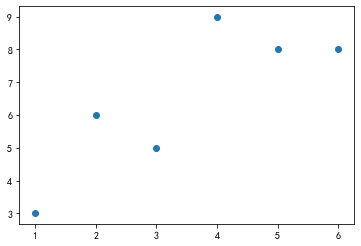

In [20]:
#---------随机梯度下降（Stochastic Gradient Descent）---------------
x=np.array([1,2,3,4,5,6])
y=np.array([3,6,5,9,8,8])
plt.scatter(x,y)

#1.sgd最小化模型误差
"""
w=w-alpha*delta
注：w为回归系数，alpha学习率，在[0 1]之间，通常设为0.3

方程式：y=b0+b1*x
"""
#2.sgd算法

"""
迭代#1
令：b0=0， b1=0，则y=0+0*x
因为error(i)=p(i)-y(i),所以error(1)=0-3=-3,其中p是预测值

因为b0(t+1)=b0(t)-alpha*error，所以b0(t+1)=0-0.3*(-3)=0.9
因为b1(t+1)=b1(t)-alpha*error*x，所以b1(t+1)=0-0.3*(-3)*1=0.9

迭代#2
令：b0=0.9， b1=0.9，则y=0.9+0.9*x
因为error(i)=p(i)-y(i),所以error(1)=2.7-6=-3.3

因为b0(t+1)=b0(t)-alpha*error，所以b0(t+1)=0.9-0.3*(-3.3)=1.89
因为b1(t+1)=b1(t)-alpha*error*x，所以b1(t+1)=0.9-0.3*(-3.3)*2=2.88

迭代#3......

注：一共6行数据，迭代后重新从第一行开始，则6次迭代为一个epoch（全部样本训练一次）
"""
print()

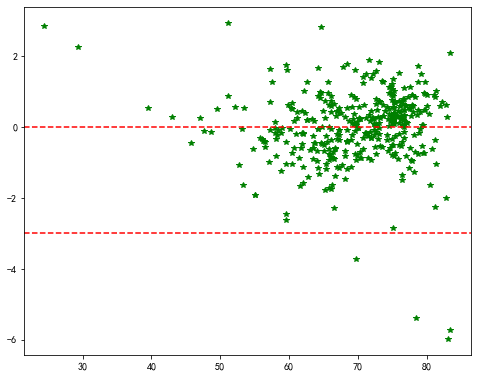

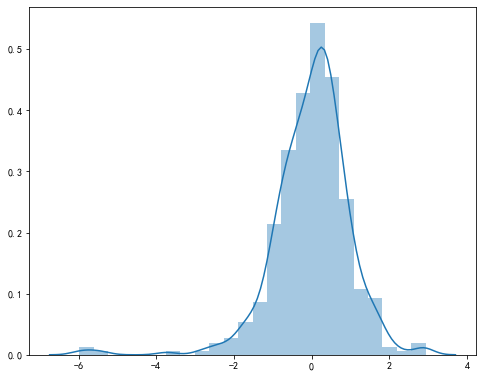

In [31]:
#-----------残差分析--------------------
#result.resid#保存残差   
zstd=(result.resid-np.mean(result.resid))/np.std(result.resid)#计算标准化残差
#绘制残差图，检查模型整体状况
fig,ax=plt.subplots(figsize=(8,6.4))
ax.plot(result.fittedvalues,zstd,"g*",label="resid and predict")#预测值和标准化残差
ax.axhline(y=-3,ls="--",color="r")#参考线横向hline和纵向vline或[np.mean(data.绩效总分)]
ax.axhline(y=0,ls="--",color="r")

fig,ax=plt.subplots(figsize=(8,6.4))
sns.distplot(zstd, hist=True,bins=24)

In [32]:
#--------消除预测值-------
data1=pd.concat([data,zstd],axis=1)
data2=data1[data1.iloc[:,-1]>-3]
result2=smf.ols("体重~饮食+性别+亲缘+运动时间+骑行时间+骑行时间*骑行时间",data=data2).fit()#回归方法
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     体重   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     198.4
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          5.47e-105
Time:                        17:22:54   Log-Likelihood:                -1237.6
No. Observations:                 398   AIC:                             2487.
Df Residuals:                     392   BIC:                             2511.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9776      2.666     11.621      0.000      25.737      36.218
饮食             1.6495      0.577      2.856      0.005       0.514       2.785
性别             1.5280      0.572      2.673      0.008       0.404       2.652
亲缘             1.9269      0.316      6.090      0.000       1.305       2.549
运动时间         -10.2675      0.890    -11.538      0.000     -12.017      -8.518
骑行时间          11.9809      0.584     20.515      0.000      10.833      13.129
==============================================================================
Omnibus:                       11.948   Durbin-Watson:                   1.437
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               22.490
Skew:                          -0.101   Prob(JB):                     1.31e-05
Kurtosis:                       4.147   Cond. No.                         46.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
#---------老样本和新样本预测----------------
x=data2.iloc[:,1:6]
x_new=pd.DataFrame([{'饮食':2,'性别':2,'亲缘':1,'运动时间':3.22,'骑行时间':1.36}])
result2.predict(x_new)

,饮食,性别,亲缘,运动时间,骑行时间
0,2,1,4,0.357143,3.714286
